<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Useful-Code-(HSIC,-Data-Creation,-Cross-Validation" data-toc-modified-id="Useful-Code-(HSIC,-Data-Creation,-Cross-Validation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Useful Code (HSIC, Data Creation, Cross-Validation</a></span><ul class="toc-item"><li><span><a href="#HSIC:" data-toc-modified-id="HSIC:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>HSIC:</a></span></li><li><span><a href="#Data-Generator" data-toc-modified-id="Data-Generator-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Generator</a></span></li><li><span><a href="#Functions-for-Cross-Validation" data-toc-modified-id="Functions-for-Cross-Validation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Functions for Cross-Validation</a></span></li></ul></li><li><span><a href="#Measuring-Regression-Performance-on-Synthesised-Data" data-toc-modified-id="Measuring-Regression-Performance-on-Synthesised-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Measuring Regression Performance on Synthesised Data</a></span><ul class="toc-item"><li><span><a href="#Model-1:" data-toc-modified-id="Model-1:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model 1:</a></span><ul class="toc-item"><li><span><a href="#PLS:" data-toc-modified-id="PLS:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>PLS:</a></span></li><li><span><a href="#gKDR:" data-toc-modified-id="gKDR:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>gKDR:</a></span></li><li><span><a href="#HSIC:" data-toc-modified-id="HSIC:-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>HSIC:</a></span></li></ul></li><li><span><a href="#Model-2:" data-toc-modified-id="Model-2:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model 2:</a></span><ul class="toc-item"><li><span><a href="#PLS:" data-toc-modified-id="PLS:-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>PLS:</a></span></li><li><span><a href="#gKDR:" data-toc-modified-id="gKDR:-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>gKDR:</a></span></li><li><span><a href="#HSIC:" data-toc-modified-id="HSIC:-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>HSIC:</a></span></li></ul></li><li><span><a href="#Model-3:" data-toc-modified-id="Model-3:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model 3:</a></span><ul class="toc-item"><li><span><a href="#PLS:" data-toc-modified-id="PLS:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>PLS:</a></span></li><li><span><a href="#gKDR:" data-toc-modified-id="gKDR:-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>gKDR:</a></span></li><li><span><a href="#HSIC:" data-toc-modified-id="HSIC:-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HSIC:</a></span></li></ul></li><li><span><a href="#Model-4:" data-toc-modified-id="Model-4:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Model 4:</a></span><ul class="toc-item"><li><span><a href="#PLS:" data-toc-modified-id="PLS:-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>PLS:</a></span></li><li><span><a href="#gKDR:" data-toc-modified-id="gKDR:-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>gKDR:</a></span></li><li><span><a href="#HSIC:" data-toc-modified-id="HSIC:-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>HSIC:</a></span></li></ul></li></ul></li><li><span><a href="#Compiling-all-data-into-Pandas-DataFrame:" data-toc-modified-id="Compiling-all-data-into-Pandas-DataFrame:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compiling all data into Pandas DataFrame:</a></span></li><li><span><a href="#Real-life-Data" data-toc-modified-id="Real-life-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Real-life Data</a></span></li></ul></div>

In [162]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import sklearn.cross_decomposition
import sklearn.model_selection
import sklearn.neighbors
import sklearn.preprocessing

matplotlib.rc('figure', figsize=(8, 5))

import mogp_emulator

# Useful Code (HSIC, Data Creation, Cross-Validation

## HSIC:

In [53]:
# HSIC CODE:
import autograd.numpy
from pymanopt.manifolds import Stiefel
from pymanopt import Problem
from pymanopt.solvers import SteepestDescent

from scipy.spatial.distance import pdist

global XHSIC, YHSIC, sgx, sgy


def median_distance(X):
    return np.mean(pdist(X))


def gaussian_rbf_gram(MAT1, MAT2, sigma_val):
    """ Computes Gaussian RBF Gram matrix kernel using autograd.numpy:

            k(X, Y) = - exp[||X - Y||^2 / (2sigma^2)]

    REFERENCE: https://github.com/amber0309/HSIC

    Parameters
    ----------
    MAT1 : np.ndarray | Matrix X in the formula.
    MAT2 : np.ndarray | Matrix Y in the formula.
    sigma_val : float | Value for regularising coeff.
    Returns
    -------
    np.ndarray | Gram matrix
        Description of returned object.
    """
    G = autograd.numpy.sum(MAT1*MAT1, 1).reshape(MAT1.shape[0],1)
    H = autograd.numpy.sum(MAT2*MAT2, 1).reshape(MAT2.shape[0],1)

    Q = autograd.numpy.tile(G, (1, MAT2.shape[0]))
    R = autograd.numpy.tile(H.T, (MAT1.shape[0], 1))

    H = Q + R - 2* autograd.numpy.dot(MAT1, MAT2.T)
    return autograd.numpy.exp(-H/2/(sigma_val**2))


def HSIC_gRBF(XMAT, YMAT, sgx, sgy):
    """ Computes the Hilbert-Schmidt Independence Criterion between matrices
        X and Y:

            HSIC = 1/(N - 1)^2 * trace(Gx H Gy H)

    Parameters
    ----------
    XMAT : np.ndarray | Matrix X in the formula.
    YMAT : np.ndarray | Matrix Y in the formula.
    sgx : float | sigma_x parameter in gaussian RBF kernel
    sgy : float | sigma_y parameter in gaussian RBF kernel

    Returns
    -------
    float | value of HSIC calculated
    """
    N, p = XMAT.shape
    HMAT = autograd.numpy.eye(N) - autograd.numpy.ones((N, N))

    Gx = gaussian_rbf_gram(XMAT, XMAT, sgx)

    if len(YMAT.shape) == 2:
        Gy = gaussian_rbf_gram(YMAT, YMAT, sgy)
    elif len(YMAT.shape) == 1:  # Just a vector, convert to column matrix
        Gy = gaussian_rbf_gram(YMAT[:, None], YMAT[:, None], sgy)
    else:
        raise Exception("Error with Y Dimensions")
    return autograd.numpy.trace(Gx @ HMAT @ Gy @ HMAT)


def hsic_cost_function(P):
    """ Helper function for Pymanopt optimisation."""
    global XHSIC, YHSIC, sgx, sgy
    return - HSIC_gRBF(XHSIC @ P, YHSIC, sgx, sgy)

## Data Generator

In [54]:
def synthetic_data_generator(N, model_number):
    """Generates data as explained in section 3.1 of the project.

    Parameters
    ----------
    N : int | Number of samples to generate
    model_number : int | Model to follow

    Returns
    -------
    X : np.array | Array containing input variables
    Y : np.array | Array containing response variables
    """
    
    if model_number == 1:
        X = np.random.uniform(low=-1.0, high=1.0, size=(N, 20))
        W = np.random.normal(loc=0.0, scale=np.sqrt(0.1), size=N)    
        Y = 0.25 * (X[:, 0] + 3*X[:, 1] - X[:, 2])
        
    elif model_number == 2:
        A = np.random.uniform(low=-1.0, high=1.0, size=N)
        B = np.random.uniform(low=-1.0, high=1.0, size=N)
        W = np.random.normal(loc=0.0, scale=np.sqrt(0.1), size=N)
        
        X1 = A[:, None] + np.random.normal(
            loc=0.0, scale=np.sqrt(0.01), size=(N, 10))
        X2 = B[:, None] + np.random.normal(
            loc=0.0, scale=np.sqrt(0.01), size=(N, 10))
        X = np.concatenate([X1, X2], axis=1)
        Y = np.sum(X, axis=1)
        
    elif model_number == 3:
        X = np.random.uniform(low=-1.0, high=1.0, size=(N, 20))
        W = np.random.normal(loc=0.0, scale=np.sqrt(0.1), size=N)
        Z = X[:, 0] + 0.5*X[:, 1]
        Y = Z * np.cos(Z) + W
        
    elif model_number == 4:
        X = np.random.uniform(low=-1.0, high=1.0, size=(N, 50))
        W = np.random.beta(2, 4, size=N)
        Z = (X[:, 0]**2 + X[:, 4])*(X[:, 1]**2 - X[:, 3])
        Y = W * Z**2
    return X, Y

## Functions for Cross-Validation

In [55]:
def PLS_cross_validation(X, Y, dim_space):
    """ Performs cross-validation to find optimal dimension on 
        data (X, Y) through the values of the array dim_space.
 
    Parameters
    ----------
    X : np.array | Array containing input variables
    Y : np.array | Array containing response variables
    dim_space : np.array | Array of integers containing dims.
    
    Returns
    -------
    optimal_dim : int | Value for the optimal dimension found.
    MSE_min_insample : float | Value for in-sample MSE
    MSE_out_sample : float | Value for out-of-sample MSE
    """
    # First normalise the data:
    Xscaled = sklearn.preprocessing.StandardScaler().fit_transform(X)

    # Splitting data into training and test sets.
    # This is to compute in-sample and out-of-sample errors.
    Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
        Xscaled, Y, test_size=0.25, shuffle=True)
    
    # Cross-Validation:
    kfold_maker = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
    
    # Initialising MSE array for choosing optimal dimension:
    mse_array = np.zeros(dim_space.shape)
    
    for idx, d in enumerate(dim_space):
        kfold_split = kfold_maker.split(Xtrain, Ytrain)
        for k, (train_id, val_id) in enumerate(kfold_split):
            Xtrain_insample = Xtrain[train_id]
            Ytrain_insample = Ytrain[train_id]
        
            Xval_insample = Xtrain[val_id]
            Yval_insample = Ytrain[val_id]
            
            # Fit Partial Least Squares:
            PLS = sklearn.cross_decomposition.PLSRegression(n_components=d)
            PLS.fit(Xtrain_insample, Ytrain_insample)
            Xtrain_insample_pls = PLS.transform(Xtrain_insample)
            
            # Train simple kNN model:
            kNN_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
            kNN_5.fit(Xtrain_insample_pls, Ytrain_insample)
            
            # Transform validation data using Partial Least Squares:
            Xval_insample_pls = PLS.transform(Xval_insample)
            
            # Prediction using kNN_5:
            Ypreds = kNN_5.predict(Xval_insample_pls)
            
            mean_square_error = sklearn.metrics.mean_squared_error(Yval_insample, Ypreds)
            
            mse_array[idx] += mean_square_error
    
    # Finding minimum error:
    mse_array /= 5
    index_optim = np.unravel_index(np.argmin(mse_array, axis=None), mse_array.shape)[0]
    optimal_dim = dim_space[index_optim]
    MSE_min_insample = mse_array[index_optim]
  
    # Computing out-of-sample errors:
    PLS = sklearn.cross_decomposition.PLSRegression(n_components=optimal_dim)
    PLS.fit(Xtrain, Ytrain)
    Xtrain_PLS = PLS.transform(Xtrain)
    
    # Train kNN on full training data:
    kNN_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
    kNN_5.fit(Xtrain_PLS, Ytrain)
    
    # Transform test data using PLS:
    Xtest_PLS = PLS.transform(Xtest)
    
    # Prediction using kNN_5:
    Ypreds = kNN_5.predict(Xtest_PLS)
    
    MSE_out_sample = sklearn.metrics.mean_squared_error(Ytest, Ypreds)
    return optimal_dim, MSE_min_insample, MSE_out_sample

In [56]:
def gKDR_cross_validation(X, Y, param_space, VERBOSE=True):
    """ Performs K-Fold cross validation on data using gKDR and kNN approach.
    Parameters
    ----------
    X : np.array | Array containing input variables
    Y : np.array | Array containing response variables
    param_space : dict | Dictionary containing parameter space to perform Grid-Search
    target_dimension : int | Final dimensionality to use
        
    Returns
    -------
    optimal_dimension : int | Value for the optimal dimension found.
    SGX_optim : float | Value for the optimal gamma for the X-kernel
    SGY_optim : float | Value for the optimal gamma for the Y-kernel
    MSE_min_insample : float | Value for in-sample MSE
    MSE_out_sample : float | Value for out-of-sample MSE
    """   
    # First normalise the data:
    Xscaled = sklearn.preprocessing.StandardScaler().fit_transform(X)

    # Splitting data into training and test sets.
    # This is to compute in-sample and out-of-sample errors.
    Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
        Xscaled, Y, test_size=0.25, shuffle=True)
    
    # Cross-Validation:
    kfold_maker = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
    
    dims_array = param_space['dims']
    SGX_array = param_space["SGX"]
    SGY_array = param_space["SGY"]
    
    mse_array = np.zeros((dims_array.size, SGX_array.size, SGY_array.size), dtype=float)
    
    for a, dim in enumerate(dims_array):
        for b, SGX in enumerate(SGX_array):
            for c, SGY in enumerate(SGY_array):
                if VERBOSE:
                    print(f"dim={dim}, SGX={SGX}, SGY={SGY}")                

                kfold_split = kfold_maker.split(Xtrain, Ytrain)
                for k, (train_id, val_id) in enumerate(kfold_split):
                    Xtrain_insample = Xtrain[train_id]
                    Ytrain_insample = Ytrain[train_id]

                    Xval_insample = Xtrain[val_id]
                    Yval_insample = Ytrain[val_id]
                    
                    # Take EPS = 10^(-dim) as suggested in gKDR paper.
                    EPS = 10**(-float(dim))
                    
                    params = (SGX, SGY)
                    B = gKDR.gKDR(Xtrain_insample, Ytrain_insample,
                                        dim, EPS, "Gaussian_RBF", (params))[0].real
                    Xtrain_insample_gKDR = Xtrain_insample @ B  # Perform dimensionality reduction
                    
                    # Train simple kNN model:
                    kNN_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
                    kNN_5.fit(Xtrain_insample_gKDR, Ytrain_insample)
                    
                    # Transform validation data using gKDR:
                    Xval_insample_gKDR = Xval_insample @ B
                    
                    # Prediction using kNN_5:
                    Ypreds = kNN_5.predict(Xval_insample_gKDR)

                    mean_square_error = sklearn.metrics.mean_squared_error(Yval_insample, Ypreds)

                    mse_array[a, b, c] += mean_square_error
    # Averaging since we took errors 5 times due to 5-fold cross validation
    mse_array /= 5
    index_optim = np.unravel_index(np.argmin(mse_array, axis=None), mse_array.shape)
    MSE_min_insample = mse_array[index_optim]
    optimal_dim = dims_array[index_optim[0]]
    SGX_optim = SGX_array[index_optim[1]]
    SGY_optim = SGY_array[index_optim[2]]    
    
    
    # Test optimal model:
    EPS = 10**(-float(optimal_dim))
    B = gKDR.gKDR(Xtrain, Ytrain, optimal_dim, EPS, "Gaussian_RBF", (SGX_optim, SGY_optim))[0].real
    Xtrain_gKDR = Xtrain @ B
    Xtest_gKDR = Xtest @ B
    
    kNN_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
    kNN_5.fit(Xtrain_gKDR, Ytrain)
    Ypreds = kNN_5.predict(Xtest_gKDR)
    MSE_out_sample = sklearn.metrics.mean_squared_error(Ytest, Ypreds)
    return optimal_dim, SGX_optim, SGY_optim, MSE_min_insample, MSE_out_sample

# Measuring Regression Performance on Synthesised Data

The following are helper functions for performing cross-validation with the different DR methods using the data given using a kNN regressor algorithm with 5 neighbours:

In [57]:
# gKDR with Gaussian RBF Kernel:
param_space = {
    'dims' : np.array([2, 3, 4], dtype=int),
    'SGX' : np.logspace(-4, 2, num=16),
    'SGY' : np.logspace(-4, 2, num=16),
}

## Model 1:

In [58]:
N = 300
X1, Y1 = synthetic_data_generator(N, 1)

### PLS:

In [78]:
# PLS:
PLS_optim_dim1, MSE_insample_PLS1, MSE_outsample_PLS1 = PLS_cross_validation(X1, Y1, np.array([2, 3, 4, 5]))
print("Partial Least Squares Results:")
print(f"MSE In-Sample Minimal = {MSE_insample_PLS1:.6f}")
print(f"MSE Out-of-Sample = {MSE_outsample_PLS1:.6f}")
print(f"PLS Optimal Dimension Found = {PLS_optim_dim1}")

Partial Least Squares Results:
MSE In-Sample Minimal = 0.007278
MSE Out-of-Sample = 0.007501
PLS Optimal Dimension Found = 2


### gKDR:

In [79]:
gKDR1 = mogp_emulator.gKDR(X1, Y1, 2)

Xtrain1, Xtest1, Ytrain1, Ytest1 = sklearn.model_selection.train_test_split(
    X1, Y1, test_size=0.25, shuffle=True)
Xtrain1_gKDR = gKDR1(Xtrain1)
Xtest1_gKDR = gKDR1(Xtest1)

kNN_51 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
kNN_51.fit(Xtrain1_gKDR, Ytrain1)
Ypreds1 = kNN_51.predict(Xtest1_gKDR)
MSE_outsample_gKDR1 = sklearn.metrics.mean_squared_error(Ytest1, Ypreds1)
print("gKDR with Gaussian Kernel Results:")
print(f"MSE Out-of-Sample = {MSE_outsample_gKDR1:.6f}")

gKDR with Gaussian Kernel Results:
MSE Out-of-Sample = 0.005711


### HSIC:

In [91]:
# HSIC Code Usage
# Declare global variables:
global XHSIC, YHSIC, sgx, sgy

# Set current data e.g. X, Y
XHSIC = autograd.numpy.array(Xtrain1.copy())
YHSIC = autograd.numpy.array(Ytrain1.copy())

# Compute sgx, sgy:
sgx = 0.01
sgy = median_distance(YHSIC[:, None])  # If Y is a matrix, remove [:, None]

# Using pymanopt:
manifold = Stiefel(20, 2)  # Manifold B from R^X_dims to R^target_dims
problem = Problem(manifold=manifold, cost=hsic_cost_function)
solver = SteepestDescent()
Popt = solver.solve(problem)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	-7.2611484874479929e+06	2.35454601e+07
    2	-7.3285613819917757e+06	2.98356010e+07
    3	-7.4767324026140170e+06	3.43105449e+07
    4	-7.5623130049266974e+06	4.66859079e+07
    5	-7.7790231111291535e+06	2.91220300e+07
    6	-7.8085050377326626e+06	4.22720533e+07
    7	-7.8874264280978050e+06	1.73539203e+07
    8	-7.9330933661525883e+06	4.18542936e+07
    9	-8.0267660320474990e+06	2.71564116e+07
   10	-8.0326404856232051e+06	3.76258482e+07
   11	-8.0530829864826947e+06	2.78358497e+07
   12	-8.0624350984741412e+06	3.33446710e+07
   13	-8.0888700902745035e+06	1.58361808e+07
   14	-8.1019971707122959e+06	3.41432989e+07
   15	-8.1333664336070651e+06	1.28635177e+07
   16	-8.2033541667405348e+06	3.80213744e+07
   17	-8.2668769401958855e+06	3.05686432e+07
   18	-8.3109462134816451e+06	4.42138529e+07
   19	-8.3650710590147916e+06	4.40969023e+07
   20	-8.4157053846836686e+06	2.82239561e+07


  188	-8.8410558199681845e+06	3.44728748e+06
  189	-8.8426129453278389e+06	1.34899849e+07
  190	-8.8452173726843521e+06	4.64040940e+06
  191	-8.8458631408072226e+06	5.09959579e+06
  192	-8.8459249981161468e+06	1.03703753e+07
  193	-8.8461634012347758e+06	9.61751660e+06
  194	-8.8469640523420051e+06	6.64330714e+06
  195	-8.8471495522078313e+06	9.87990658e+06
  196	-8.8478026663070284e+06	7.57056372e+06
  197	-8.8487455181002449e+06	5.69351350e+06
  198	-8.8494693090520129e+06	6.12296446e+06
  199	-8.8498236955316477e+06	9.54736502e+06
  200	-8.8509085331553277e+06	5.43914469e+06
  201	-8.8516574792810753e+06	7.53123426e+06
  202	-8.8525842923411895e+06	7.15806633e+06
  203	-8.8530087029871512e+06	1.05038466e+07
  204	-8.8543068913622629e+06	5.97648455e+06
  205	-8.8552109726225697e+06	8.20089907e+06
  206	-8.8563118509582765e+06	8.01465767e+06
  207	-8.8569552094509080e+06	1.09413977e+07
  208	-8.8587088838200085e+06	5.15189946e+06
  209	-8.8598127656585835e+06	1.96430059e+07
  210	-8.8

  378	-8.8888003072472252e+06	2.92594526e+05
  379	-8.8888014818084054e+06	1.39280686e+05
  380	-8.8888022086192239e+06	2.87493781e+05
  381	-8.8888035518861338e+06	1.34739895e+05
  382	-8.8888041237727758e+06	3.36468388e+05
  383	-8.8888056650510058e+06	1.39946806e+05
  384	-8.8888063939039968e+06	1.92093038e+05
  385	-8.8888065064907297e+06	3.13007796e+05
  386	-8.8888069238697290e+06	2.67722750e+05
  387	-8.8888080054643080e+06	1.15450967e+05
  388	-8.8888095113852806e+06	4.22109602e+05
  389	-8.8888120716783032e+06	1.39693439e+05
  390	-8.8888126839469634e+06	1.64464845e+05
  391	-8.8888127181356847e+06	3.08521113e+05
  392	-8.8888128517244607e+06	2.94277634e+05
  393	-8.8888133336012140e+06	2.37456545e+05
  394	-8.8888142904976793e+06	1.14748338e+05
  395	-8.8888151847799588e+06	2.41288417e+05
  396	-8.8888154739723336e+06	2.87231369e+05
  397	-8.8888163725283258e+06	1.66002711e+05
  398	-8.8888168181096539e+06	2.06235921e+05
  399	-8.8888175612053536e+06	1.36565581e+05
  400	-8.8

  563	-8.8888647039610613e+06	4.07314028e+04
  564	-8.8888652301091533e+06	1.78425319e+05
  565	-8.8888656798104234e+06	5.16886202e+04
  566	-8.8888657476471905e+06	8.11594797e+04
  567	-8.8888658602289297e+06	5.19177794e+04
  568	-8.8888659245701265e+06	8.15474287e+04
  569	-8.8888660394316036e+06	4.76017986e+04
  570	-8.8888661080373246e+06	8.70349686e+04
  571	-8.8888662349184323e+06	4.46700295e+04
  572	-8.8888663069686908e+06	9.70707337e+04
  573	-8.8888664581025410e+06	3.80639052e+04
  574	-8.8888667423042431e+06	1.45161132e+05
  575	-8.8888668328008689e+06	1.39573533e+05
  576	-8.8888670805705562e+06	5.64720691e+04
  577	-8.8888671170138568e+06	8.74046295e+04
  578	-8.8888672205316331e+06	4.30066122e+04
  579	-8.8888672899899166e+06	8.29976649e+04
  580	-8.8888674005739838e+06	4.94434235e+04
  581	-8.8888674397260323e+06	8.71425198e+04
  582	-8.8888675469957069e+06	4.00843524e+04
  583	-8.8888676305611115e+06	8.45276882e+04
  584	-8.8888677278086636e+06	6.39460973e+04
  585	-8.8

  754	-8.8888749439795353e+06	7.68195106e+04
  755	-8.8888750209749918e+06	2.74998451e+04
  756	-8.8888750386090092e+06	2.51324910e+04
  757	-8.8888750557421651e+06	2.54683440e+04
  758	-8.8888750728217121e+06	2.43877410e+04
  759	-8.8888750897950884e+06	2.53957799e+04
  760	-8.8888751066899374e+06	2.42235901e+04
  761	-8.8888751234758534e+06	2.52893887e+04
  762	-8.8888751401856020e+06	2.40536063e+04
  763	-8.8888751567857154e+06	2.51862583e+04
  764	-8.8888751733132936e+06	2.38811120e+04
  765	-8.8888751897314694e+06	2.50881891e+04
  766	-8.8888752060798891e+06	2.37074283e+04
  767	-8.8888752223201655e+06	2.49940609e+04
  768	-8.8888752384920325e+06	2.35340182e+04
  769	-8.8888752545557581e+06	2.49018892e+04
  770	-8.8888752705539614e+06	2.33590854e+04
  771	-8.8888752864448763e+06	2.48138170e+04
  772	-8.8888753022727780e+06	2.31838845e+04
  773	-8.8888753179953303e+06	2.47294280e+04
  774	-8.8888753336557262e+06	2.30099304e+04
  775	-8.8888753492102697e+06	2.46464704e+04
  776	-8.8

  938	-8.8888770912490748e+06	3.99549794e+04
  939	-8.8888771046485901e+06	3.20330655e+04
  940	-8.8888771129566543e+06	2.91535339e+04
  941	-8.8888771256913878e+06	1.55854910e+04
  942	-8.8888771318801325e+06	1.47941779e+04
  943	-8.8888771380094402e+06	1.51856686e+04
  944	-8.8888771441155560e+06	1.46437452e+04
  945	-8.8888771501894761e+06	1.51323076e+04
  946	-8.8888771562386788e+06	1.45612653e+04
  947	-8.8888771622550692e+06	1.50754370e+04
  948	-8.8888771682468951e+06	1.44766280e+04
  949	-8.8888771742076371e+06	1.50187474e+04
  950	-8.8888771801430546e+06	1.43957101e+04
  951	-8.8888771860467270e+06	1.49601639e+04
  952	-8.8888771919276714e+06	1.43126793e+04
  953	-8.8888771977764573e+06	1.49077932e+04
  954	-8.8888772036019899e+06	1.42278541e+04
  955	-8.8888772093958557e+06	1.48540163e+04
  956	-8.8888772151673660e+06	1.41437859e+04
  957	-8.8888772209073938e+06	1.48023261e+04
  958	-8.8888772266260944e+06	1.40595691e+04
  959	-8.8888772323131431e+06	1.47531733e+04
  960	-8.8

In [94]:
Xtrain1_HSIC = Xtrain1 @ Popt
Xtest1_HSIC = Xtest1 @ Popt

kNN_512 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
kNN_512.fit(Xtrain1_HSIC, Ytrain1)
Ypreds12 = kNN_512.predict(Xtest1_HSIC)
MSE_outsample_HSIC1 = sklearn.metrics.mean_squared_error(Ytest1, Ypreds12)
print("HSIC with Gaussian Kernel Results:")
print(f"MSE Out-of-Sample = {MSE_outsample_HSIC1:.6f}")

HSIC with Gaussian Kernel Results:
MSE Out-of-Sample = 0.333295


## Model 2:

In [111]:
X2, Y2 = synthetic_data_generator(N, 2)

### PLS:

In [128]:
# PLS:
PLS_optim_dim2, MSE_insample_PLS2, MSE_outsample_PLS2 = PLS_cross_validation(X2, Y2, np.array([2, 3, 4, 5]))
print("Partial Least Squares Results:")
print(f"MSE In-Sample Minimal = {MSE_insample_PLS2:.6f}")
print(f"MSE Out-of-Sample = {MSE_outsample_PLS2:.6f}")
print(f"PLS Optimal Dimension Found = {PLS_optim_dim2}")

Partial Least Squares Results:
MSE In-Sample Minimal = 0.472322
MSE Out-of-Sample = 0.457543
PLS Optimal Dimension Found = 4


### gKDR:

In [134]:
gKDR2 = mogp_emulator.gKDR(X2, Y2, 2)

Xtrain2, Xtest2, Ytrain2, Ytest2 = sklearn.model_selection.train_test_split(
    X2, Y2, test_size=0.25, shuffle=True)
Xtrain2_gKDR = gKDR2(Xtrain2)
Xtest2_gKDR = gKDR2(Xtest2)

kNN_52 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
kNN_52.fit(Xtrain2_gKDR, Ytrain2)
Ypreds2 = kNN_52.predict(Xtest2_gKDR)
MSE_outsample_gKDR2 = sklearn.metrics.mean_squared_error(Ytest2, Ypreds2)
print("gKDR with Gaussian Kernel Results:")
print(f"MSE Out-of-Sample = {MSE_outsample_gKDR2:.6f}")

gKDR with Gaussian Kernel Results:
MSE Out-of-Sample = 0.026844


### HSIC:

In [124]:
# HSIC Code Usage
# Declare global variables:
global XHSIC, YHSIC, sgx, sgy

# Set current data e.g. X, Y
XHSIC = autograd.numpy.array(Xtrain2.copy())
YHSIC = autograd.numpy.array(Ytrain2.copy())

# Compute sgx, sgy:
sgx = 0.01
sgy = median_distance(YHSIC[:, None])  # If Y is a matrix, remove [:, None]

# Using pymanopt:
manifold = Stiefel(20, 2)  # Manifold B from R^X_dims to R^target_dims
problem = Problem(manifold=manifold, cost=hsic_cost_function)
solver = SteepestDescent()
Popt = solver.solve(problem)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	-7.3852668858771231e+06	8.59868253e+06
    2	-7.9796781480368655e+06	9.48650174e+07
    3	-7.9860603879001094e+06	1.04023227e+08
    4	-8.0106127760875802e+06	9.55853391e+07
    5	-8.0740909622749723e+06	3.07923782e+07
    6	-8.0762936491670851e+06	4.17446201e+07
    7	-8.0833467154332884e+06	2.57139931e+07
    8	-8.0877099931590464e+06	2.44269739e+07
    9	-8.0913880939843683e+06	1.72381508e+07
   10	-8.0939344469403941e+06	2.40189026e+07
   11	-8.0968056519788038e+06	2.26183153e+07
   12	-8.0985250982233323e+06	3.02523796e+07
   13	-8.1029823016067268e+06	1.30834680e+07
   14	-8.1097770550468937e+06	4.39779796e+07
   15	-8.1192470180831691e+06	2.34251276e+07
   16	-8.1220914341005357e+06	2.18649502e+07
   17	-8.1232908439160874e+06	3.23461736e+07
   18	-8.1270123241441902e+06	1.88108731e+07
   19	-8.1294297168517727e+06	2.24907350e+07
   20	-8.1319884536267715e+06	2.45478442e+07


  188	-8.5894165135273188e+06	1.40135349e+07
  189	-8.5907710677357875e+06	1.27442885e+07
  190	-8.5921038366973493e+06	1.42023451e+07
  191	-8.5934376730347704e+06	1.26080356e+07
  192	-8.5947501117474101e+06	1.43932146e+07
  193	-8.5947619115981013e+06	2.85062585e+07
  194	-8.5948089471548684e+06	2.83084164e+07
  195	-8.5949944516108073e+06	2.75158307e+07
  196	-8.5956932052257061e+06	2.43316702e+07
  197	-8.5977228909101263e+06	1.23178037e+07
  198	-8.5986550088751279e+06	2.34047745e+07
  199	-8.6009076894352641e+06	9.53180290e+06
  200	-8.6082255662123747e+06	2.16069307e+07
  201	-8.6094210276860297e+06	2.24164298e+07
  202	-8.6117807641576715e+06	1.05585298e+07
  203	-8.6136722337595094e+06	2.42596740e+07
  204	-8.6157573070221171e+06	1.85481510e+07
  205	-8.6173720873385444e+06	1.39479892e+07
  206	-8.6185808752754629e+06	1.61856656e+07
  207	-8.6193084832965732e+06	2.25429633e+07
  208	-8.6212592418083046e+06	1.02681659e+07
  209	-8.6222622319384795e+06	3.96166834e+07
  210	-8.6

  371	-8.8572863389241733e+06	1.09233209e+07
  372	-8.8580002765031978e+06	1.01736629e+07
  373	-8.8587076234075557e+06	1.09934988e+07
  374	-8.8594198350152969e+06	1.00732615e+07
  375	-8.8601256915292833e+06	1.10649513e+07
  376	-8.8608365266044810e+06	9.97601716e+06
  377	-8.8615412476271987e+06	1.11370360e+07
  378	-8.8615417547429670e+06	2.29086257e+07
  379	-8.8615437826401796e+06	2.28958490e+07
  380	-8.8615518851740472e+06	2.28447403e+07
  381	-8.8615841501955613e+06	2.26402799e+07
  382	-8.8617108729549292e+06	2.18221372e+07
  383	-8.8621793482562508e+06	1.85539604e+07
  384	-8.8633670978793427e+06	7.72339301e+06
  385	-8.8656156108951010e+06	2.63906256e+07
  386	-8.8662944113050513e+06	2.71042735e+07
  387	-8.8682600303598270e+06	1.28674213e+07
  388	-8.8689740724040810e+06	1.18045244e+07
  389	-8.8689827231837660e+06	2.21537178e+07
  390	-8.8690171509176325e+06	2.19292925e+07
  391	-8.8691520347684845e+06	2.10314002e+07
  392	-8.8696449574193396e+06	1.74509127e+07
  393	-8.8

  561	-8.9846851169883795e+06	6.75603567e+06
  562	-8.9851197403961997e+06	1.44034292e+07
  563	-8.9858323572229594e+06	7.74769080e+06
  564	-8.9859667417031713e+06	1.65381954e+07
  565	-8.9864261498475485e+06	1.18636526e+07
  566	-8.9867245157966204e+06	1.34160387e+07
  567	-8.9873825006448962e+06	5.79751819e+06
  568	-8.9893107999243215e+06	1.50554926e+07
  569	-8.9900742068973612e+06	8.02896908e+06
  570	-8.9904543786572367e+06	7.91088091e+06
  571	-8.9908348570896052e+06	7.99857946e+06
  572	-8.9912131376551613e+06	7.91848439e+06
  573	-8.9915917249379307e+06	7.95410828e+06
  574	-8.9919681236097589e+06	7.92621455e+06
  575	-8.9923448638007864e+06	7.90939578e+06
  576	-8.9927194251351058e+06	7.93480336e+06
  577	-8.9930943625622448e+06	7.86446211e+06
  578	-8.9934671325757727e+06	7.94423624e+06
  579	-8.9938403133453429e+06	7.81935035e+06
  580	-8.9942113397973292e+06	7.95450327e+06
  581	-8.9945828116993606e+06	7.77410413e+06
  582	-8.9949521440714896e+06	7.96559175e+06
  583	-8.9

  749	-9.0574860363649800e+06	4.96913939e+06
  750	-9.0576616949797720e+06	1.94516192e+07
  751	-9.0582603268049173e+06	1.37554229e+07
  752	-9.0583499136354215e+06	1.57507244e+07
  753	-9.0586674696736634e+06	1.22118989e+07
  754	-9.0591368064219952e+06	6.86784270e+06
  755	-9.0591632340771183e+06	1.32708887e+07
  756	-9.0592641238971781e+06	1.20683681e+07
  757	-9.0595850627556220e+06	7.39788483e+06
  758	-9.0598202013772447e+06	7.41570103e+06
  759	-9.0598894808640108e+06	1.22238449e+07
  760	-9.0601284377256893e+06	8.95642243e+06
  761	-9.0603538167985976e+06	9.19761579e+06
  762	-9.0606301431404762e+06	7.96766219e+06
  763	-9.0609008877034374e+06	5.51556796e+06
  764	-9.0611604404639527e+06	7.96881175e+06
  765	-9.0612039344718605e+06	1.26244973e+07
  766	-9.0613638193035722e+06	1.06069970e+07
  767	-9.0617487074219715e+06	4.47354098e+06
  768	-9.0632393457955178e+06	5.74900319e+06
  769	-9.0634061877926923e+06	1.12983154e+07
  770	-9.0638224025258590e+06	4.57927136e+06
  771	-9.0

  938	-9.1154577879230306e+06	8.52639830e+06
  939	-9.1157286206169650e+06	5.51314984e+06
  940	-9.1159028357813433e+06	8.59445815e+06
  941	-9.1161655596434157e+06	6.21587011e+06
  942	-9.1163462023834940e+06	7.44923234e+06
  943	-9.1165081374248713e+06	8.70145967e+06
  944	-9.1167862060844488e+06	5.46405462e+06
  945	-9.1169574255984724e+06	8.91262892e+06
  946	-9.1172431258208938e+06	5.60001754e+06
  947	-9.1174036663737148e+06	9.07219191e+06
  948	-9.1177039305029623e+06	4.94959720e+06
  949	-9.1179148738846481e+06	9.73746630e+06
  950	-9.1182288910013605e+06	6.21680957e+06
  951	-9.1183656517853756e+06	9.29743919e+06
  952	-9.1186735512460377e+06	4.18250817e+06
  953	-9.1196804888715800e+06	9.06222559e+06
  954	-9.1198469086904489e+06	9.80614904e+06
  955	-9.1201881065436788e+06	4.44130909e+06
  956	-9.1204390374033842e+06	1.83047631e+07
  957	-9.1212004132936392e+06	9.67324822e+06
  958	-9.1215282535431050e+06	5.37766119e+06
  959	-9.1216607619724013e+06	1.07573118e+07
  960	-9.1

In [127]:
Xtrain2_HSIC = Xtrain2 @ Popt
Xtest2_HSIC = Xtest2 @ Popt

kNN_522 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
kNN_522.fit(Xtrain2_HSIC, Ytrain2)
Ypreds22 = kNN_522.predict(Xtest2_HSIC)
MSE_outsample_HSIC2 = sklearn.metrics.mean_squared_error(Ytest2, Ypreds22)
print("HSIC with Gaussian Kernel Results:")
print(f"MSE Out-of-Sample = {MSE_outsample_HSIC2:.6f}")

HSIC with Gaussian Kernel Results:
MSE Out-of-Sample = 63.494639


## Model 3:

In [136]:
X3, Y3 = synthetic_data_generator(N, 3)

### PLS:

In [137]:
# PLS:
PLS_optim_dim3, MSE_insample_PLS3, MSE_outsample_PLS3 = PLS_cross_validation(X3, Y3, np.array([2, 3, 4, 5]))
print("Partial Least Squares Results:")
print(f"MSE In-Sample Minimal = {MSE_insample_PLS3:.6f}")
print(f"MSE Out-of-Sample = {MSE_outsample_PLS3:.6f}")
print(f"PLS Optimal Dimension Found = {PLS_optim_dim3}")

Partial Least Squares Results:
MSE In-Sample Minimal = 0.116127
MSE Out-of-Sample = 0.101824
PLS Optimal Dimension Found = 2


### gKDR:

In [150]:
gKDR3 = mogp_emulator.gKDR(X3, Y3, 2)

Xtrain3, Xtest3, Ytrain3, Ytest3 = sklearn.model_selection.train_test_split(
    X3, Y3, test_size=0.25, shuffle=True)
Xtrain3_gKDR = gKDR3(Xtrain3)
Xtest3_gKDR = gKDR3(Xtest3)

kNN_53 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
kNN_53.fit(Xtrain3_gKDR, Ytrain3)
Ypreds3 = kNN_53.predict(Xtest3_gKDR)
MSE_outsample_gKDR3 = sklearn.metrics.mean_squared_error(Ytest3, Ypreds3)
print("gKDR with Gaussian Kernel Results:")
print(f"MSE Out-of-Sample = {MSE_outsample_gKDR3:.6f}")

gKDR with Gaussian Kernel Results:
MSE Out-of-Sample = 0.086715


### HSIC:

In [141]:
# HSIC Code Usage
# Declare global variables:
global XHSIC, YHSIC, sgx, sgy

# Set current data e.g. X, Y
XHSIC = autograd.numpy.array(Xtrain3.copy())
YHSIC = autograd.numpy.array(Ytrain3.copy())

# Compute sgx, sgy:
sgx = 0.01
sgy = median_distance(YHSIC[:, None])  # If Y is a matrix, remove [:, None]

# Using pymanopt:
manifold = Stiefel(20, 2)  # Manifold B from R^X_dims to R^target_dims
problem = Problem(manifold=manifold, cost=hsic_cost_function)
solver = SteepestDescent()
Popt = solver.solve(problem)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	-7.0398012901324332e+06	1.73922347e+07
    2	-7.0840940662813177e+06	1.93288451e+07
    3	-7.1953053263496896e+06	2.68536368e+07
    4	-7.2414204498207420e+06	2.35877041e+07
    5	-7.2760210517091798e+06	2.89325670e+07
    6	-7.3086591205662917e+06	3.13644296e+07
    7	-7.3710339311777018e+06	2.97745006e+07
    8	-7.4250931684785029e+06	2.71672458e+07
    9	-7.4594087462669089e+06	2.84221059e+07
   10	-7.4691056100012744e+06	3.56934590e+07
   11	-7.5030660819973145e+06	2.66478400e+07
   12	-7.5369919697568119e+06	1.69338849e+07
   13	-7.5551548466703491e+06	3.17129203e+07
   14	-7.6007721210558880e+06	1.85859388e+07
   15	-7.6483693340712162e+06	4.27993447e+07
   16	-7.6891648404439995e+06	3.62059428e+07
   17	-7.7281853179776873e+06	1.46201255e+07
   18	-7.7411443834056258e+06	2.61386149e+07
   19	-7.7585685825231615e+06	1.86434514e+07
   20	-7.7694434359047897e+06	2.11460870e+07


  186	-8.4317279396306351e+06	3.92171055e+06
  187	-8.4342256944673844e+06	1.41549565e+07
  188	-8.4369497066169828e+06	9.65465251e+06
  189	-8.4384756717437077e+06	9.14218551e+06
  190	-8.4394860431516301e+06	1.19041471e+07
  191	-8.4420303693042193e+06	5.47895409e+06
  192	-8.4529527026740257e+06	1.06155787e+07
  193	-8.4555582636846937e+06	1.82084360e+07
  194	-8.4618903595019840e+06	8.83579114e+06
  195	-8.4927299978808351e+06	1.36066180e+07
  196	-8.5232443195048049e+06	4.53698990e+07
  197	-8.5413969788713604e+06	4.15238631e+07
  198	-8.5689329571587984e+06	2.01423133e+07
  199	-8.5773759382786173e+06	2.31286418e+07
  200	-8.5840116497769915e+06	2.47894222e+07
  201	-8.5948021226704158e+06	1.42563850e+07
  202	-8.5958554368803427e+06	2.74494689e+07
  203	-8.5997203708589636e+06	2.29433472e+07
  204	-8.6085750981599241e+06	8.15381123e+06
  205	-8.6313589309151415e+06	9.45734042e+06
  206	-8.6335948115575071e+06	9.75520803e+06
  207	-8.6338548060651179e+06	1.73866258e+07
  208	-8.6

  369	-8.7402270420124643e+06	1.02848299e+05
  370	-8.7402272158493567e+06	4.40588961e+04
  371	-8.7402276204128396e+06	1.27796819e+05
  372	-8.7402278066529408e+06	9.23825297e+04
  373	-8.7402279479560666e+06	5.57191415e+04
  374	-8.7402279879909940e+06	9.43247730e+04
  375	-8.7402281062315069e+06	4.94184523e+04
  376	-8.7402281609610189e+06	8.50111418e+04
  377	-8.7402282860579081e+06	3.51150212e+04
  378	-8.7402287387164067e+06	4.59886065e+04
  379	-8.7402287952671573e+06	4.14981888e+04
  380	-8.7402288499157168e+06	4.59892212e+04
  381	-8.7402289035796262e+06	3.98067096e+04
  382	-8.7402289548700619e+06	4.54255836e+04
  383	-8.7402290056919046e+06	3.75922799e+04
  384	-8.7402290543841626e+06	4.52087616e+04
  385	-8.7402291028406508e+06	3.55000238e+04
  386	-8.7402291493293084e+06	4.51393469e+04
  387	-8.7402291957789566e+06	3.34881640e+04
  388	-8.7402292404981889e+06	4.51485156e+04
  389	-8.7402292405250873e+06	7.77694382e+04
  390	-8.7402292406326979e+06	7.77272468e+04
  391	-8.7

Terminated - min stepsize reached after 559 iterations, 13.23 seconds.



In [145]:
Xtrain3_HSIC = Xtrain3 @ Popt
Xtest3_HSIC = Xtest3 @ Popt

kNN_523 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
kNN_523.fit(Xtrain3_HSIC, Ytrain3)
Ypreds23 = kNN_523.predict(Xtest3_HSIC)
MSE_outsample_HSIC3 = sklearn.metrics.mean_squared_error(Ytest3, Ypreds23)
print("HSIC with Gaussian Kernel Results:")
print(f"MSE Out-of-Sample = {MSE_outsample_HSIC3:.6f}")

HSIC with Gaussian Kernel Results:
MSE Out-of-Sample = 0.333251


## Model 4:

In [146]:
X4, Y4 = synthetic_data_generator(N, 4)

### PLS:

In [156]:
# PLS:
PLS_optim_dim4, MSE_insample_PLS4, MSE_outsample_PLS4 = PLS_cross_validation(X4, Y4, np.array([1, 2, 3, 4, 5]))
print("Partial Least Squares Results:")
print(f"MSE In-Sample Minimal = {MSE_insample_PLS4:.6f}")
print(f"MSE Out-of-Sample = {MSE_outsample_PLS4:.6f}")
print(f"PLS Optimal Dimension Found = {PLS_optim_dim4}")

Partial Least Squares Results:
MSE In-Sample Minimal = 0.058471
MSE Out-of-Sample = 0.043081
PLS Optimal Dimension Found = 5


### gKDR:

In [157]:
gKDR4 = mogp_emulator.gKDR(X4, Y4, 4)

Xtrain4, Xtest4, Ytrain4, Ytest4 = sklearn.model_selection.train_test_split(
    X4, Y4, test_size=0.25, shuffle=True)
Xtrain4_gKDR = gKDR4(Xtrain4)
Xtest4_gKDR = gKDR4(Xtest4)

kNN_54 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
kNN_54.fit(Xtrain4_gKDR, Ytrain4)
Ypreds4 = kNN_54.predict(Xtest4_gKDR)
MSE_outsample_gKDR4 = sklearn.metrics.mean_squared_error(Ytest4, Ypreds4)
print("gKDR with Gaussian Kernel Results:")
print(f"MSE Out-of-Sample = {MSE_outsample_gKDR4:.6f}")

gKDR with Gaussian Kernel Results:
MSE Out-of-Sample = 0.074608


### HSIC:

In [159]:
# HSIC Code Usage
# Declare global variables:
global XHSIC, YHSIC, sgx, sgy

# Set current data e.g. X, Y
XHSIC = autograd.numpy.array(Xtrain4.copy())
YHSIC = autograd.numpy.array(Ytrain4.copy())

# Compute sgx, sgy:
sgx = 0.01
sgy = median_distance(YHSIC[:, None])  # If Y is a matrix, remove [:, None]

# Using pymanopt:
manifold = Stiefel(50, 2)  # Manifold B from R^X_dims to R^target_dims
problem = Problem(manifold=manifold, cost=hsic_cost_function)
solver = SteepestDescent()
Popt = solver.solve(problem)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	-8.8515605066606551e+06	4.73394710e+07
    2	-8.9538071160790976e+06	6.09742049e+07
    3	-9.1333502802799530e+06	9.20526172e+07
    4	-9.2976777980582863e+06	1.02972498e+08
    5	-9.4729992783351578e+06	9.06522151e+07
    6	-9.5422914031014163e+06	1.20408833e+08
    7	-9.7855146534974054e+06	8.64345624e+07
    8	-9.9197293193180002e+06	5.62993878e+07
    9	-9.9511033985842504e+06	7.25807350e+07
   10	-9.9903530950649548e+06	4.75164709e+07
   11	-9.9935271859947741e+06	6.35786208e+07
   12	-1.0005142310967874e+07	5.27248181e+07
   13	-1.0028600328561619e+07	2.44119487e+07
   14	-1.0040058072469316e+07	9.37202282e+07
   15	-1.0081332704341546e+07	7.41935721e+07
   16	-1.0102378982057132e+07	7.89940113e+07
   17	-1.0155104395303652e+07	3.05074803e+07
   18	-1.0202230528197549e+07	6.21636901e+07
   19	-1.0244731471022181e+07	4.56575896e+07
   20	-1.0253041314639982e+07	7.25597917e+07


  185	-1.1489024868048560e+07	6.46372354e+07
  186	-1.1509565723334834e+07	5.96154367e+07
  187	-1.1522149302871201e+07	5.76376224e+07
  188	-1.1543762100559399e+07	2.49673438e+07
  189	-1.1548944656645142e+07	3.78597516e+07
  190	-1.1558399425358441e+07	1.68690909e+07
  191	-1.1562646781692781e+07	2.25732010e+07
  192	-1.1566450754654743e+07	1.45454471e+07
  193	-1.1568514088160854e+07	2.32750148e+07
  194	-1.1572082786398217e+07	1.20717472e+07
  195	-1.1572441531511609e+07	2.75314995e+07
  196	-1.1573766850042176e+07	2.33530083e+07
  197	-1.1577036162398968e+07	8.41921771e+06
  198	-1.1580000320908375e+07	2.17833266e+07
  199	-1.1582911461653113e+07	7.18257731e+06
  200	-1.1584525930261396e+07	2.49457035e+07
  201	-1.1588158425956126e+07	6.44100298e+06
  202	-1.1590507637039237e+07	4.76714466e+07
  203	-1.1598294481803095e+07	3.14115843e+07
  204	-1.1603846865402769e+07	1.60712162e+07
  205	-1.1606143489932992e+07	1.62170932e+07
  206	-1.1607759852766991e+07	2.89909052e+07
  207	-1.1

  375	-1.2107500005295433e+07	9.97929037e+06
  376	-1.2108373588787187e+07	1.00352915e+07
  377	-1.2109231525748767e+07	7.79425114e+06
  378	-1.2109995566936534e+07	9.99859497e+06
  379	-1.2110057593111532e+07	1.62980879e+07
  380	-1.2110296019696478e+07	1.50327702e+07
  381	-1.2111084882579595e+07	1.00262856e+07
  382	-1.2111824154203005e+07	6.58870356e+06
  383	-1.2112390621614579e+07	1.01614911e+07
  384	-1.2112861569862362e+07	1.05897972e+07
  385	-1.2113555098680526e+07	7.20176897e+06
  386	-1.2113918609938983e+07	9.45859436e+06
  387	-1.2114508277224127e+07	6.22939253e+06
  388	-1.2114831336302117e+07	9.23167602e+06
  389	-1.2115392550954416e+07	5.43792217e+06
  390	-1.2115665224678446e+07	9.86528405e+06
  391	-1.2116272444151245e+07	3.95107628e+06
  392	-1.2118207127785293e+07	7.58774474e+06
  393	-1.2118549757614993e+07	5.13320178e+06
  394	-1.2118723211986799e+07	6.59693866e+06
  395	-1.2119013205800939e+07	4.25756917e+06
  396	-1.2119178557091281e+07	6.60728398e+06
  397	-1.2

  742	-1.2268022944972117e+07	2.35031193e+06
  743	-1.2268083528679103e+07	9.64997112e+06
  744	-1.2268295766746145e+07	7.27217252e+06
  745	-1.2268518140266120e+07	4.71797025e+06
  746	-1.2268603795799509e+07	4.71929222e+06
  747	-1.2268732824519835e+07	3.08307873e+06
  748	-1.2268795701533740e+07	4.44681892e+06
  749	-1.2268920645461138e+07	2.30534104e+06
  750	-1.2269039170323424e+07	4.49628966e+06
  751	-1.2269067123000022e+07	5.78457855e+06
  752	-1.2269162442863338e+07	4.12587184e+06
  753	-1.2269215546920843e+07	4.91224771e+06
  754	-1.2269349490489654e+07	2.04718189e+06
  755	-1.2269646725167980e+07	6.54271076e+06
  756	-1.2269862708212994e+07	3.10253928e+06
  757	-1.2269926874712098e+07	3.59786234e+06
  758	-1.2269998749904614e+07	3.55960131e+06
  759	-1.2270050339615982e+07	4.28063289e+06
  760	-1.2270162387737365e+07	1.92845859e+06
  761	-1.2270424886203200e+07	5.78196447e+06
  762	-1.2270576791003808e+07	3.62968731e+06
  763	-1.2270615186677184e+07	4.50605366e+06
  764	-1.2

  927	-1.2276084453997239e+07	9.07617491e+05
  928	-1.2276093676114675e+07	1.02315859e+06
  929	-1.2276102862019487e+07	8.94981340e+05
  930	-1.2276111943037942e+07	1.02037498e+06
  931	-1.2276120992041556e+07	8.82335813e+05
  932	-1.2276129937890135e+07	1.01799741e+06
  933	-1.2276138855738193e+07	8.69711050e+05
  934	-1.2276147672337357e+07	1.01600115e+06
  935	-1.2276156464725632e+07	8.57138750e+05
  936	-1.2276165157931317e+07	1.01435643e+06
  937	-1.2276173830448478e+07	8.44650783e+05
  938	-1.2276182405982204e+07	1.01302888e+06
  939	-1.2276190964055680e+07	8.32277294e+05
  940	-1.2276199427446928e+07	1.01198156e+06
  941	-1.2276207876297338e+07	8.20045640e+05
  942	-1.2276216232822966e+07	1.01117673e+06
  943	-1.2276224577418849e+07	8.07978050e+05
  944	-1.2276232832078833e+07	1.01057721e+06
  945	-1.2276241077114973e+07	7.96093650e+05
  946	-1.2276249234588005e+07	1.01014760e+06
  947	-1.2276257384461693e+07	7.84405093e+05
  948	-1.2276265449111953e+07	1.00985539e+06
  949	-1.2

In [160]:
Xtrain4_HSIC = Xtrain4 @ Popt
Xtest4_HSIC = Xtest4 @ Popt

kNN_524 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
kNN_524.fit(Xtrain4_HSIC, Ytrain4)
Ypreds24 = kNN_524.predict(Xtest4_HSIC)
MSE_outsample_HSIC4 = sklearn.metrics.mean_squared_error(Ytest4, Ypreds24)
print("HSIC with Gaussian Kernel Results:")
print(f"MSE Out-of-Sample = {MSE_outsample_HSIC4:.6f}")

HSIC with Gaussian Kernel Results:
MSE Out-of-Sample = 0.092657


# Compiling all data into Pandas DataFrame:

In [176]:
model1_mses = [MSE_outsample_PLS1, MSE_outsample_gKDR1, MSE_outsample_HSIC1]
model2_mses = [MSE_outsample_PLS2, MSE_outsample_gKDR2, MSE_outsample_HSIC2]
model3_mses = [MSE_outsample_PLS3, MSE_outsample_gKDR3, MSE_outsample_HSIC3]
model4_mses = [MSE_outsample_PLS4, MSE_outsample_gKDR4, MSE_outsample_HSIC4]


df_results = pd.DataFrame(np.array([model1_mses, model2_mses, model3_mses, model4_mses]),
                         index=["Model 1", "Model 2", "Model 3", "Model 4"],
                         columns=["PLS", "gKDR", "HSIC"])
print(df_results.round(3).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    PLS &   gKDR &    HSIC \\
\midrule
Model 1 &  0.008 &  0.006 &   0.333 \\
Model 2 &  0.458 &  0.027 &  63.495 \\
Model 3 &  0.102 &  0.087 &   0.333 \\
Model 4 &  0.043 &  0.075 &   0.093 \\
\bottomrule
\end{tabular}



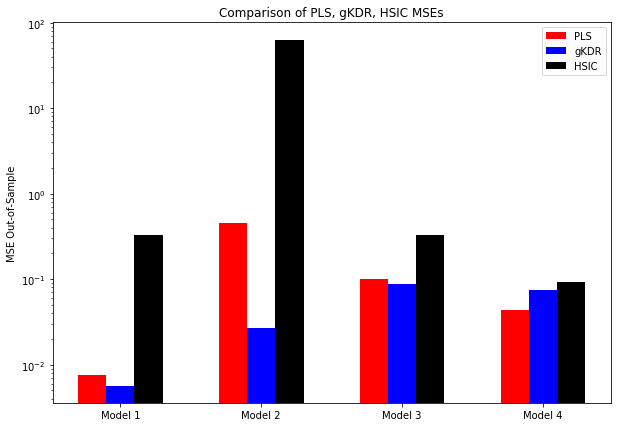

In [190]:
width = 0.2
r1 = np.arange(4)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

figure = plt.figure(figsize=(10, 7))
plt.bar(r1, df_results["PLS"], width, label='PLS', color='r')
plt.bar(r2, df_results["gKDR"], width, label='gKDR', color='b')
plt.bar(r3, df_results["HSIC"], width, label='HSIC', color='k')
plt.xticks([r + width for r in range(4)], ['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.yscale("log")
plt.legend()
plt.ylabel("MSE Out-of-Sample")
plt.title("Comparison of PLS, gKDR, HSIC MSEs")
plt.savefig("barchart1")

# Real-life Data